# 가위바위보 분류기 만들기

데이터 불러오기, resize 해주기

In [1]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!") #PIL 라이브러리 불러오기

PIL 라이브러리 import 완료!


In [2]:
# 가위 이미지 사이즈 변경

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

  # 이미지를 불러와 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지 사이즈 변경

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [4]:
# 보 이미지 사이즈 변경

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

101  images to be resized.
101  images resized.
보 이미지 resize 완료!


In [5]:
import numpy as np

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_train, y_train)=load_data(image_dir_path) # x_train 문제지(입력이미지), y_train 정답지(출력라벨)
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 303 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


라벨:  0


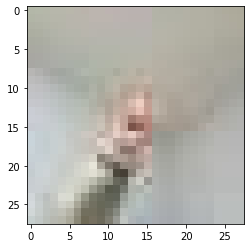

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 네트워크 설계

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu')) 
model.add(keras.layers.Dense(3, activation = 'softmax')) #가위,바위,보 3개니까 3

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [8]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs = 15) #번반복

Epoch 1/15
29/29 [==============================] - 3s 5ms/step - loss: 1.0146 - accuracy: 0.7744
Epoch 2/15
29/29 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.8278
Epoch 3/15
29/29 [==============================] - 0s 3ms/step - loss: 0.3489 - accuracy: 0.8533
Epoch 4/15
29/29 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8744
Epoch 5/15
29/29 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8933
Epoch 6/15
29/29 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9278
Epoch 7/15
29/29 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9222
Epoch 8/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9256
Epoch 9/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9389
Epoch 10/15
29/29 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.9411
Epoch 11/15
29/29 [

# 성능 평가 테스트

In [9]:
#샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)  

print("가위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!


In [10]:
#샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!


In [11]:
#샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 샘플 이미지 resize 완료!


In [12]:
#가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path, 303) #x_test,y_test만들기, 이미지 개수 정확하게 적어주어야 함
x_test_norm = x_test/255.0 

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (303, 28, 28, 3)
y_test shape: (303,)


라벨:  0


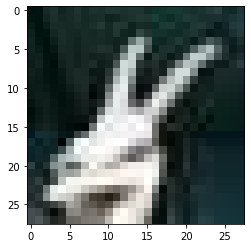

In [13]:
#이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_test_norm[0])
print('라벨: ', y_test[0])

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 307.8369 - accuracy: 0.5248
test_loss : 307.8369140625
test_accuracy : 0.5247524976730347


In [15]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


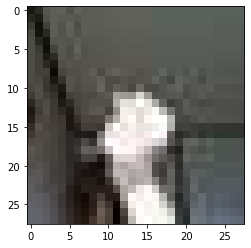

예측확률분포: [0. 1. 0.]
라벨: 0, 예측결과: 1


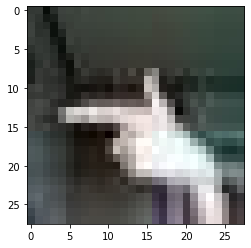

예측확률분포: [0.000000e+00 8.388915e-15 1.000000e+00]
라벨: 0, 예측결과: 2


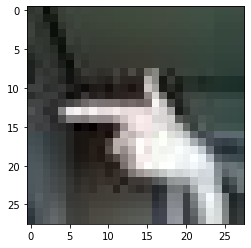

예측확률분포: [0.9893755  0.         0.01062457]
라벨: 1, 예측결과: 0


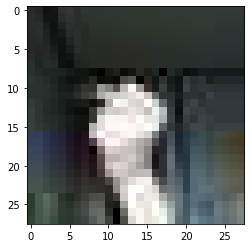

예측확률분포: [0.000000e+00 1.000000e+00 4.622379e-17]
라벨: 0, 예측결과: 1


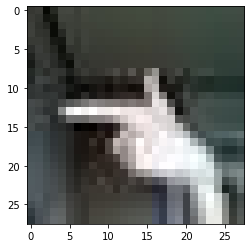

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

약 57%의 정확도가 나왔다. 리스타트 할 때마다 떨어졌다;;

# [E-01] 회고

이번 프로젝트를 하면서 정확히 알고 넘어가야겠다는 생각이 들었습니다. 예를들어 A라는 것에 대해서 설명과 정리를 해주셨는데, 이걸 제 딴에는 요약하고 기억을 했다고 넘어갔는데 후에 이게 기억이 나지 않아서 노드와 노트 정리를 여러번 찾아봤었습니다.

노드와 노트 정리를 봤음에도 불구하고 기억이 안 나거나 이해가 되지 않았던 부분은 구글링을 통해서 여러가지 자료를 찾아봤었는데, 이론에서는 도움이 되었지만 실제 프로젝트에 들어갔을 때는 저 혼자 함정을 파고 거기에 빠지는 일이 생겼습니다.

구글링과 노드의 조합으로 쓸 것만 뽑아서 사용해야 하는데, 이것 저것 다 집어넣어 대환장파티를 만들었습니다.ㅎㅎ;; def(define)을 사용함으로써 코드를 더 간결하고 수월하게 작성할 수 있는데, 어찌할 줄 몰라서 다급한 마음에 정신없이 코드를 반복하고 남발을 하다보니 저도 어지러운데 프로그램은 오죽했을까요?

그래서 프로그램이 정확도 33%라는 결과를 보여줬습니다.

은서님의 도움으로 코드를 정리하는데 위에 적었듯이 지저분한 코드를 정리하고, 훈련을 300번, 테스트를 900번을 하는 기이한 코드를 고쳤고 그 덕분에 60%까지 올라가지 못 했더라도 57%까지 올라갈 수 있었습니다.

이번 프로젝트를 통해서 제가 뭐가 부족하고 어떤 점이 약한지, 뭐를 잘못하고 있었는지 알게 되었고 LMS시간동안 어떤 방식으로 공부를 하는 것이 저에게 좋을지 감이 잡혔습니다.


제가 잘 몰랐고 잘 못 찾아본 것이기에 루브릭 평가 지표를 달성하지 못한 것이라고 생각합니다.

다행히 이번에는 엉망진창이었던 노트를 한 번더 수정할 수 있는 기회를 받아서 이렇게 정리할 수 있었습니다. 다음에는 보기 쉽도록 깔끔하게 코드를 적어 루브릭 평가 지표를 달성할 수 있게 만들고, 구글링을 통해 찾은 자료를 통해 코드를 남발하지 않도록 주의해야겠습니다.